
# ACH2016 - Inteligência Artificial

### Rubens Victor Gomes 8598878 <br> Higor 22222222 ### 

[Kmeans](#kmeans)<br>
Kmeans ++<br>
Small dataset pre processing<br>
Binary<br>
Tf-Df<br>
Tf-Idf<br>
Big dataset pre processing<br>
[Visualization of the clusters](#visualization)<br>
[Silhouette visualization](#visualization) <br>
Silhouette implementation<br>
Elbow Method<br>
IEEE Report<br>


In [43]:
#Importing the dependencies
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial import distance_matrix
import random

from __future__ import print_function
print(__doc__)

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Automatically created module for IPython interactive environment


In [44]:
#Importing the dataset

df = pd.read_csv('xclara.csv')
# Necessary for convert the DataFrame to Numpy Array
X = df.values
n_samples, n_features = X.shape
print('samples', n_samples, 'features', n_features)

samples 3000 features 2


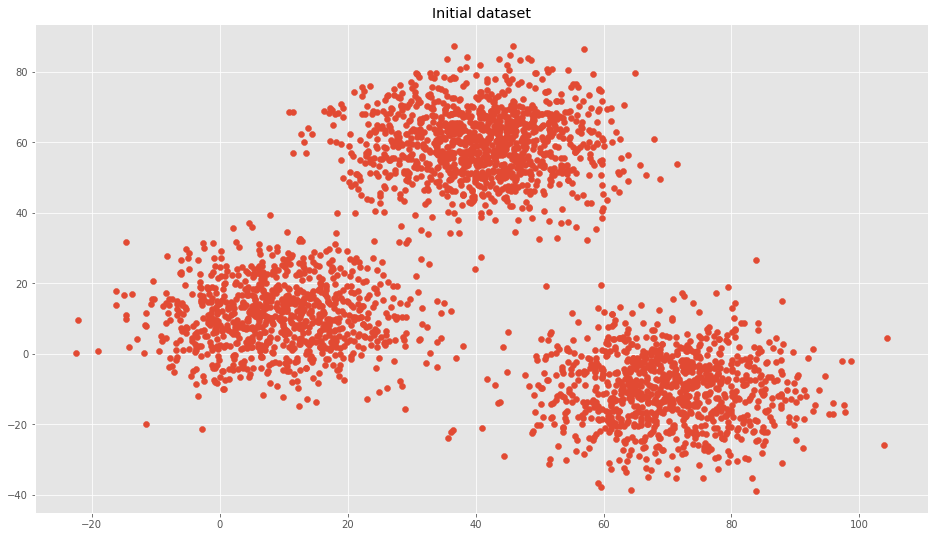

In [45]:
# Plot the inital data distribuition
plt.scatter(X[:, 0], X[:,1])
plt.title('Initial dataset')
plt.legend()
 
plt.show()

In [46]:
# Centroids initializations
# @method
# 'zeros' initialize with zeros
# 'random' pick k random datapoints
# 'k-means++' pick the first random, then pick k - 1 datapoints that maximizes the D² between them
def initializeCentroid(X, K, method):
    centroids = []
    
    if method == 'zeros':
        centroids = np.zeros(K)
        
    if method == 'random':
        # Picking k random points
        centroids = X[np.random.choice(X.shape[0], K, replace=False)]
        
    if method == 'k-means++':
        def _choose_next_center(self):
        self.probs = self.D2/self.D2.sum()
        self.cumprobs = self.probs.cumsum()
        r = random.random()
        ind = np.where(self.cumprobs >= r)[0][0]
        return(self.X[ind])
 
        first_centroid = random.sample(X, 1)
        while len(first_centroid) < K:
            self._dist_from_centers()
            self.mu.append(self._choose_next_center())
            
        # calculate the distance matrix
        # pick the first randomly
        # pick the second by the higher point distance
        dist_matrix = distance_matrix(X, centroids, p=2)
        
        for i in np.arange(num_instances):
            # finding the closest centroid
            d = dist_matrix[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]
            
    return centroids
    

IndentationError: expected an indented block (<ipython-input-46-23b0c63c0dbe>, line 18)

**KMeans** (__iterations__ :
Max number of iterations, _default 300_, 
__distance__,
Type of distance metric, _default euclidian_
__method__,
Initialization method: 'random', 'k-means++')
<a id="kmeans"></a>

In [47]:
def kMeans(X, K, max_iterations=300, distance='euclidian', method='random'):

    num_instances, num_features = X.shape
    
    # Initialize the centroids
    # Pick k random points to use as our initial centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    
    centroids_old = np.zeros(centroids.shape)
    
    clusters = np.zeros(num_instances)
    
    while (centroids_old != centroids).any():
        # make the new centroids the current
        centroids_old = centroids.copy()
        
        dist_matrix = distance_matrix(X, centroids, p=2)
        
        for i in np.arange(num_instances):
            # finding the closest centroid
            d = dist_matrix[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]
            
            # each datapoint is assigned to the closest centroid
            clusters[i] = closest_centroid
            
        # then recompute the centroids
        # for each centroid
        for c in np.arange(K):
            Xc = X[clusters == c]
            centroids[c] = np.apply_along_axis(np.mean, axis=0, arr=Xc)
    
    return centroids, clusters

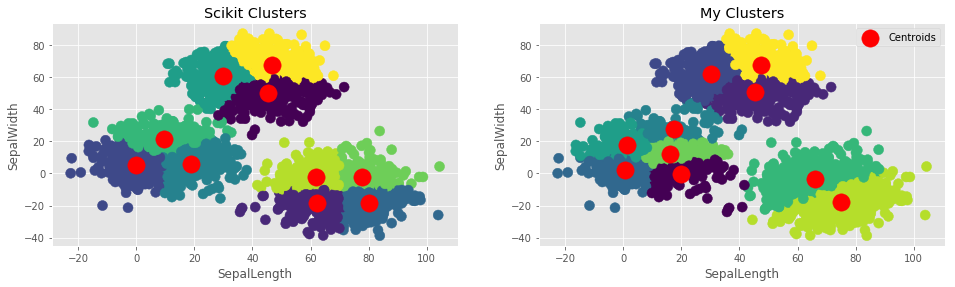

In [48]:
# Scikit Implementation
kmeans = KMeans(n_clusters=10)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# My kMeans implementation
centroids, clusters = kMeans(X, K=10)

# Comparing plots
plt.figure()
plt.subplot(221)
plt.title('Scikit Clusters')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.scatter(X[:, 0], X[:,1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')

plt.subplot(222)
plt.scatter(X[:, 0], X[:,1], s = 100, c = clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'red', label = 'Centroids')

plt.title('My Clusters')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

Scipy kMeans
For n_clusters = 3 The average silhouette_score is : 0.694558773609
My KMeans
For n_clusters = 3 The average silhouette_score is : 0.694558773609
Scipy kMeans
For n_clusters = 6 The average silhouette_score is : 0.310507674055
My KMeans
For n_clusters = 6 The average silhouette_score is : 0.417338760043


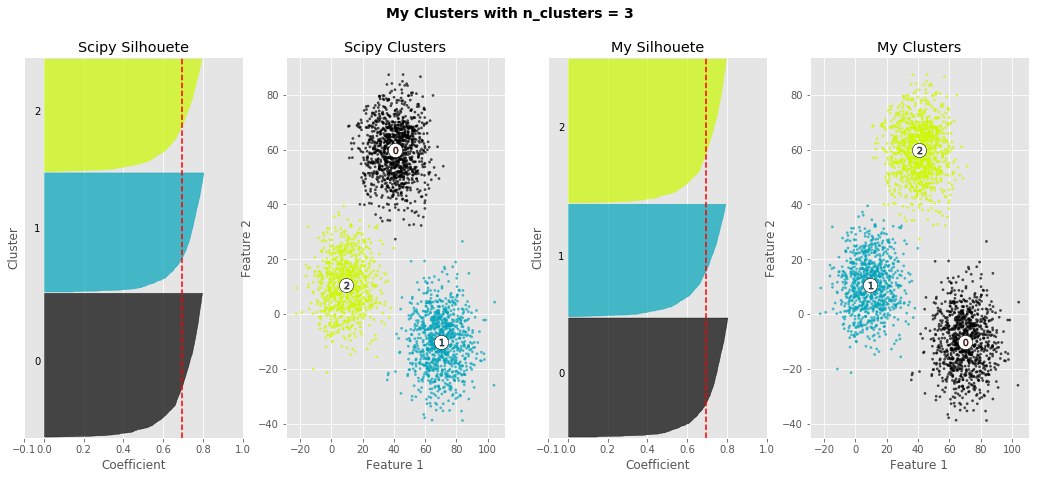

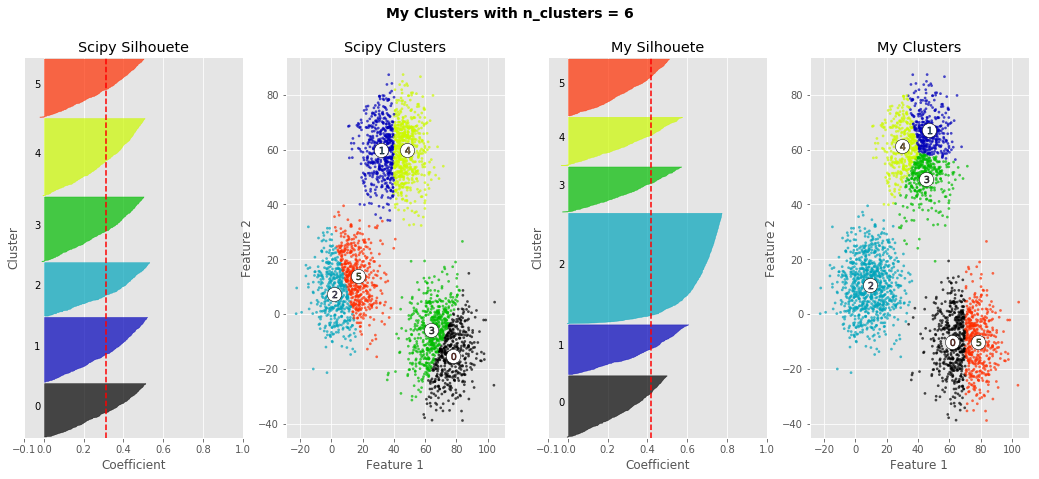

In [50]:
range_n_clusters = [3, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
    fig.set_size_inches(18, 7)

    
    # ------------------ Scipy Silhouette -------------------
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Scipy kMeans")
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Scipy Silhouete")
    ax1.set_xlabel("Coefficient")
    ax1.set_ylabel("Cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    

    # ----------------- Scipy clusters --------------------------------
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Scipy Clusters")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    
    
    
    # ----------------- My Silhouette -----------------
    ax3.set_xlim([-0.1, 1])
    ax3.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # My kMeans implementation
    centroids, clusters = kMeans(X, K=n_clusters)

    silhouette_avg = silhouette_score(X, clusters)
    print("My KMeans")
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, clusters)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax3.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax3.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax3.set_title("My Silhouete")
    ax3.set_xlabel("Coefficient")
    ax3.set_ylabel("Cluster")

    # The vertical line for average silhouette score of all the values
    ax3.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax3.set_yticks([])  # Clear the yaxis labels / ticks
    ax3.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    # ----------------- My clusters --------------------------------
    colors = cm.spectral(clusters.astype(float) / n_clusters)
    ax4.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Draw white circles at cluster centers
    ax4.scatter(centroids[:, 0], centroids[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centroids):
        ax4.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax4.set_title("My Clusters")
    ax4.set_xlabel("Feature 1")
    ax4.set_ylabel("Feature 2")
    
    # show
    plt.suptitle(("My Clusters with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
